In [1]:
# Python libraries
import os
import sys
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# To enable LaTeX and select a font
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

# Import custom functions from other notebooks
sys.path.append("myfun/")
from ipynb.fs.full.myfun_model_linlog import *
from ipynb.fs.full.myfun_density import *

2024-03-03 12:14:28.263588: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-03 12:14:28.263616: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-03 12:14:28.264452: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-03 12:14:28.270598: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-03 12:14:29.223269: W tensorflow/compiler/tf2

# Preliminary

In [2]:
## Params
Nx = 400
Nt = 320
T = 0.5

## Exact density
rho_l = 0.4/1.2
rho_r = 0.8/1.2
rho_out = 0

In [3]:
# Space - linearly distributed
dx = 1/int(Nx/3)
a = np.linspace(-1,0,int(Nx/3))
b = np.linspace(0+dx/2, 1, Nx-int(Nx/3))
xspan = np.concatenate([a, b])

# Time
tspan = np.linspace(0,T,Nt)

In [4]:
## Exact density flux
f = lambda rho: rho*(1-rho)  
fprime = lambda rho: 1-2*rho
fprime_inv = lambda rho: .5*(1-rho)

# params
toll = 1e-3
flux = [f, fprime, fprime_inv]
speed_shock = (f(rho_r) - f(rho_l))/(rho_r - rho_l)

In [5]:
## Plot params
N = Nx-1 # how many chars, cars trajs to compute
drho = 0.2
xlims = [-1,1]

titles = [fr"$Lin\ case$",fr"$Log\ case$"]

# Plot trajs with Lin/Log velocity

In [6]:
# Ode solution
L = .005
v0 = 1

In [7]:
# Solve the ODE system in this time interval
sol_lin = odeint(TD_LWR_model, xspan, tspan, args=(Nx, v0, L, 'Lin'), tfirst = True).T
sol_log = odeint(TD_LWR_model, xspan, tspan, args=(Nx, v0, L, 'Log'), tfirst = True).T

# Discretized density
ln = 1/Nx
rho_dis = [ln/np.diff(sol, axis=0) for sol in [sol_lin, sol_log]]

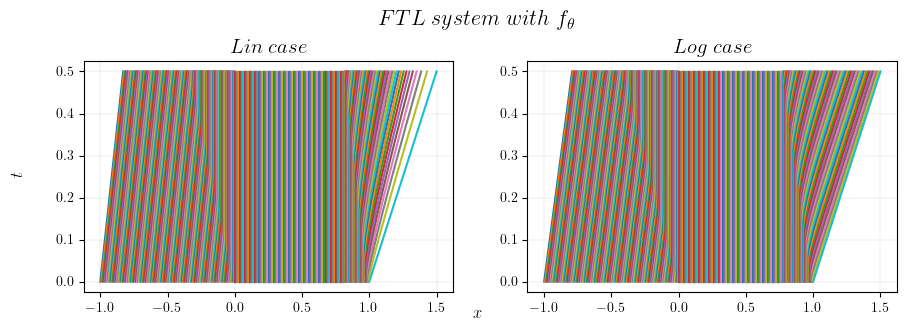

In [8]:
# Initialize the fig
nrow, ncol = 1, 2
width, height = 7, 4 # single subplot
fig, axes = plt.subplots(nrow,ncol,figsize=(width*ncol*.75,height*.75))

for sol, ax, title in zip([sol_lin, sol_log], axes.ravel(), titles):
    # Plot the true and simulated trajectories for each vehicle
    for veh in range(0, Nx):
#         ax.plot(tspan, sol[veh])
        ax.plot(sol[veh], tspan)
        
    ax.grid(color='grey', linestyle='-', linewidth=0.1)
    ax.set_title(title, fontsize=15)

plt.suptitle(fr"$FTL\ system\ with\ f_\theta$", fontsize=16,y=1.05);
# fig.supxlabel("$t$", x= 0.5)
# fig.supylabel("$X(t)$", x =0.055)
fig.supxlabel("$x$", x= 0.5)
fig.supylabel("$t$", x =0.055)
plt.show()

# Plot discretized density: testing different $L$ and $v_0$

In [9]:
## Plot params
# idx = 0, 5, 10
idx = 0, int(len(tspan)*.5), -1

In [10]:
# ## Params
# L_lin = .0024
# L_log = .01
# v0 = 1

# ## Plot params
# # idx = 0, 5, 10
# idx = 0, int(len(tspan)*.5), -1

# # Solve the ODE system in this time interval
# sol_lin2 = odeint(TD_LWR_model, xspan, tspan, args=(Nx, v0, L_lin, 'Lin'), tfirst = True).T
# sol_log2 = odeint(TD_LWR_model, xspan, tspan, args=(Nx, v0, L_log, 'Log'), tfirst = True).T
# sols2 = [sol_lin2, sol_log2]

# # Discretized density
# ln = 1/Nx
# rho_dis = [ln/np.diff(sol, axis=0) for sol in [sol_lin2, sol_log2]]

In [11]:
# # Initialize the fig
# nrow, ncol = 2, 3
# width, height = 7, 6

# fig = plt.figure(figsize=(width*ncol*.75,height*nrow*.75), constrained_layout=True)
# plt.suptitle(fr"$Discretized\ density$", fontsize=26); # Figure titles

# # create rows x 1 subfigs
# subfigs = fig.subfigures(nrows=nrow, ncols=1)

# for row, (subfig, sol, pn) in enumerate(zip(subfigs, [sol_lin2, sol_log2], rho_dis)):

#     if row == 0:
#         title = fr"$Lin\ case,\ (L,v0)={L_lin,v0}$"
#     if row == 1:
#         title = fr"$Log\ case,\ (L,v0)={L_log,v0}$"
    
#     subfig.suptitle(title, fontsize=22)
#     subfig.supxlabel("$x$", fontsize=18)
#     subfig.supylabel(fr"$\rho$", fontsize=18)

#     # create 1 x cols subplots per subfig
#     axs = subfig.subplots(nrows=1, ncols=ncol, sharey = True)

#     for col, (ax, i) in enumerate(zip(axs, idx)):

#         t = tspan[i]

#         # exact density
#         idx_t, (cp_t, d_t), _, _ = rho_2s(xlims, N, tspan, rho_l, rho_r, rho_out, flux, np.round(t,8), drho)
#         ax.plot(cp_t, d_t, c='g', ls = '-', lw = .5, marker='*', label="Exact density")

#         # Lin/Log density
#         x = sol[:,i][1:]
#         ax.plot(x,pn[:,i],c='red', ls='-', lw = 0.5, ms=5, marker='*', label="Discretized density")
# #             ax.plot(x,x*0,c='blue', ls='', ms=5, marker='o', label="Particles")

#         ax.set_ylim([0, 1])
#         ax.set_title(fr"$t={t.round(3)}$",fontsize=16)

#         ax.grid(color='grey', linestyle='-', linewidth=0.5)
#         ax.legend()

# plt.show()
# print("\n")

# Lin case

## Test with different $L$ and $v_0$

In [12]:
Lstart, Lend, Lpoints = .0023, .0027, 5
Lrange_lin = np.linspace(Lstart, Lend, Lpoints)
v0range_lin = [v0 for i in range(len(Lrange_lin))]

## Plot params
idx = 0, int(len(tspan)*.5), -1

At t=0.0, MAE=0.009187575857883656
At t=0.2507836990595611, MAE=0.007189247288207169
At t=0.5, MAE=0.01366468392192054
MAE mean value = 0.010013835689337123


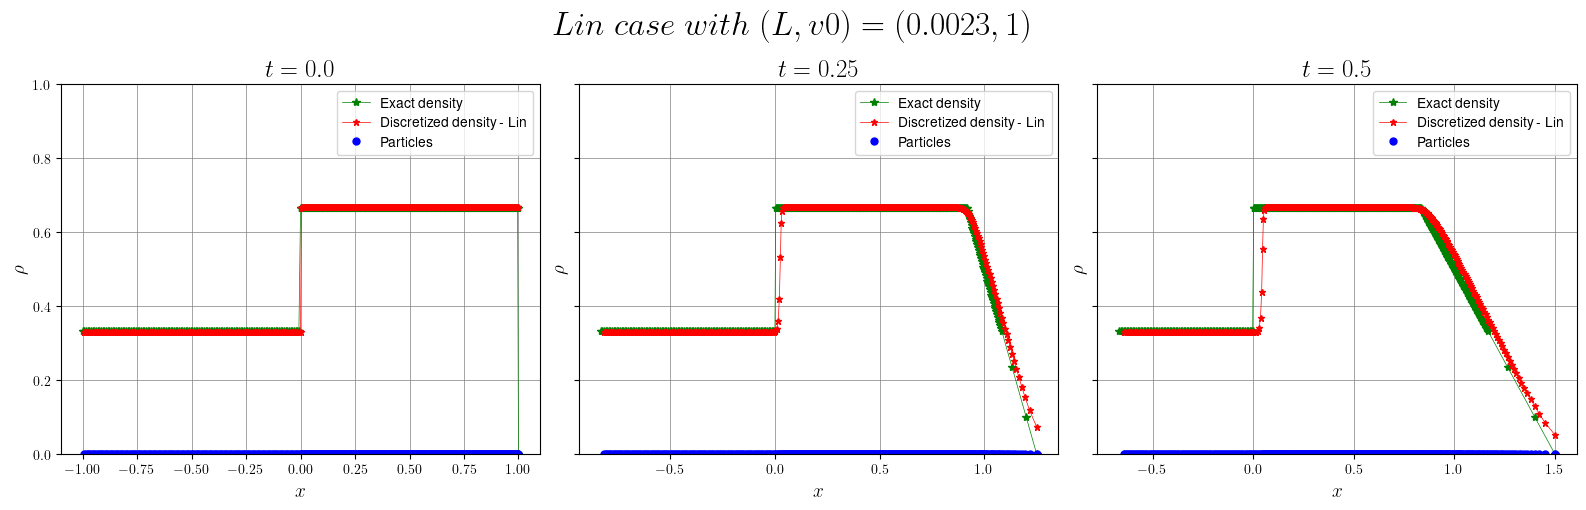



At t=0.0, MAE=0.009187575857883656
At t=0.2507836990595611, MAE=0.0066589435305090885
At t=0.5, MAE=0.012647905437294943
MAE mean value = 0.009498141608562563


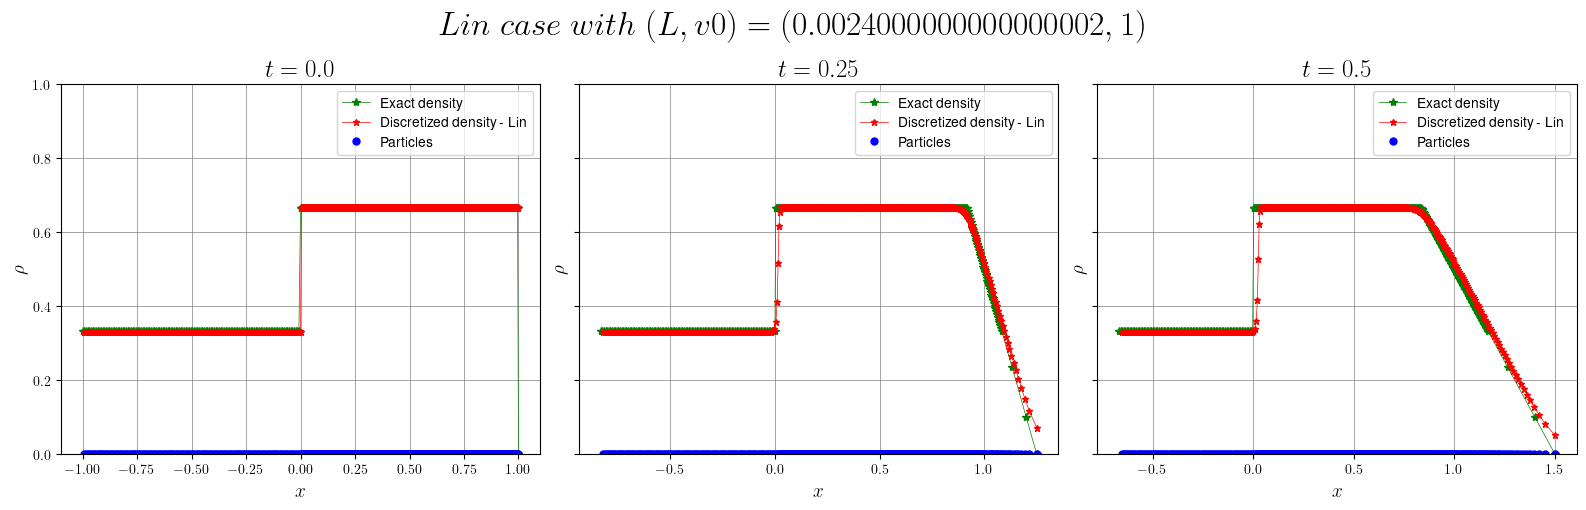



At t=0.0, MAE=0.009187575857883656
At t=0.2507836990595611, MAE=0.006946983112153754
At t=0.5, MAE=0.01339100363911506
MAE mean value = 0.009841854203050823


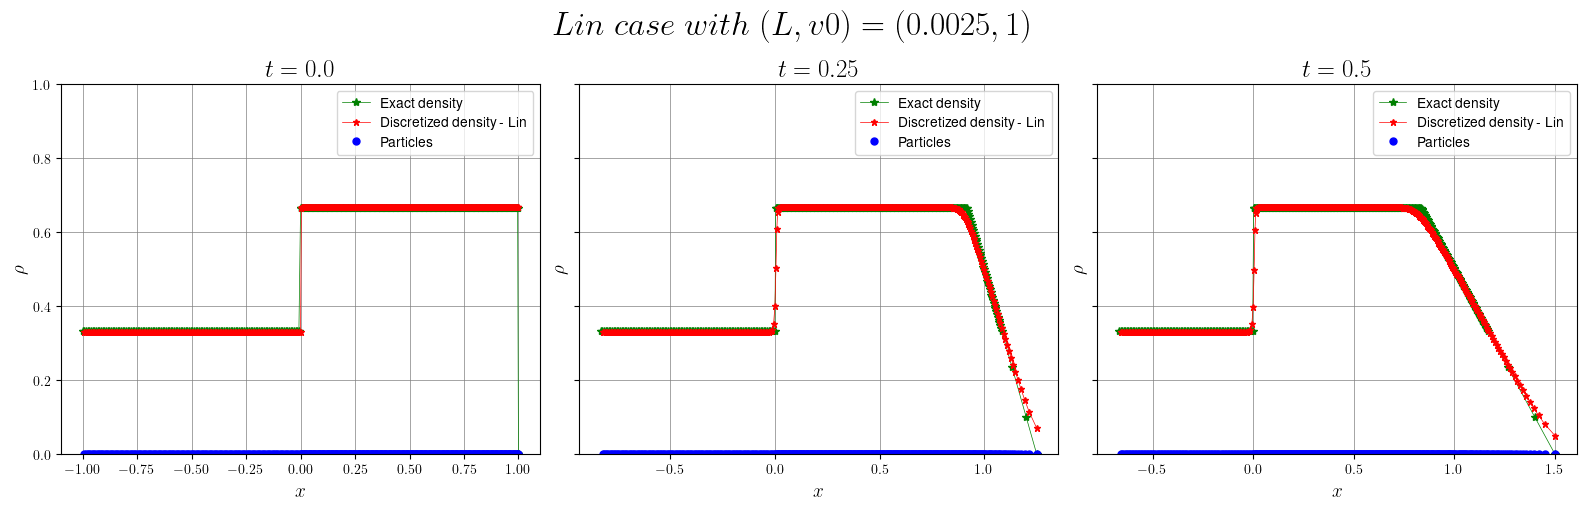



At t=0.0, MAE=0.009187575857883656
At t=0.2507836990595611, MAE=0.007924467402860735
At t=0.5, MAE=0.015738198326615424
MAE mean value = 0.010950080529119938


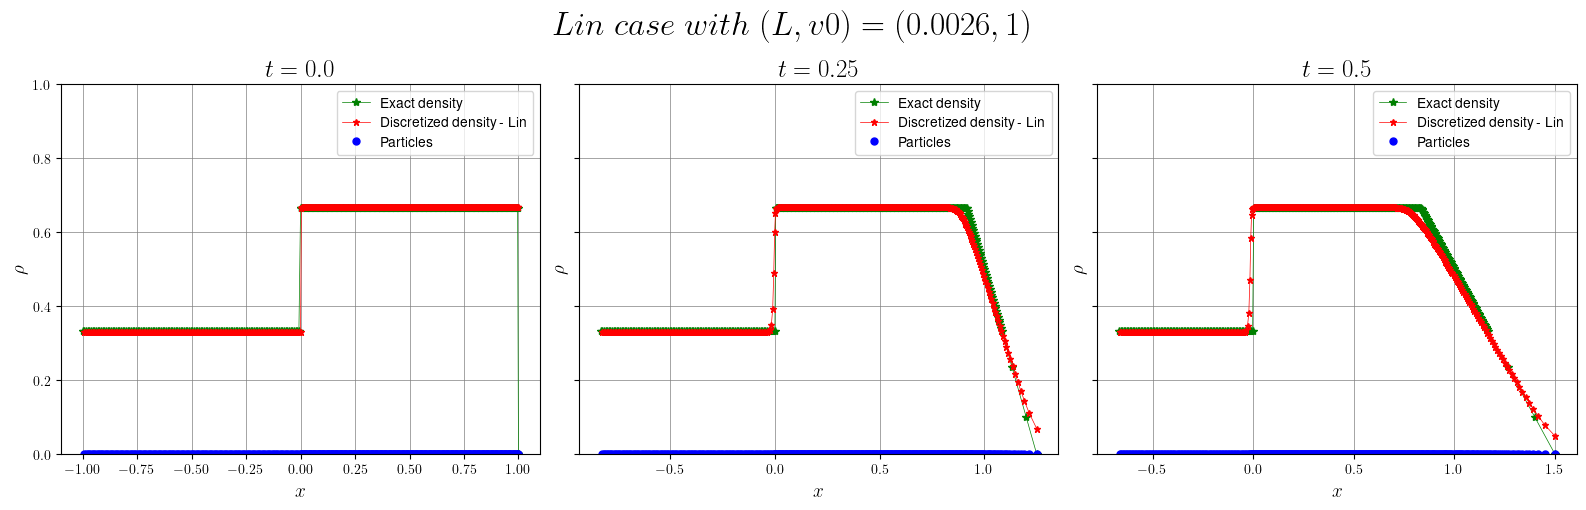



At t=0.0, MAE=0.009187575857883656
At t=0.2507836990595611, MAE=0.009338256619043528
At t=0.5, MAE=0.01907322245634639
MAE mean value = 0.012533018311091193


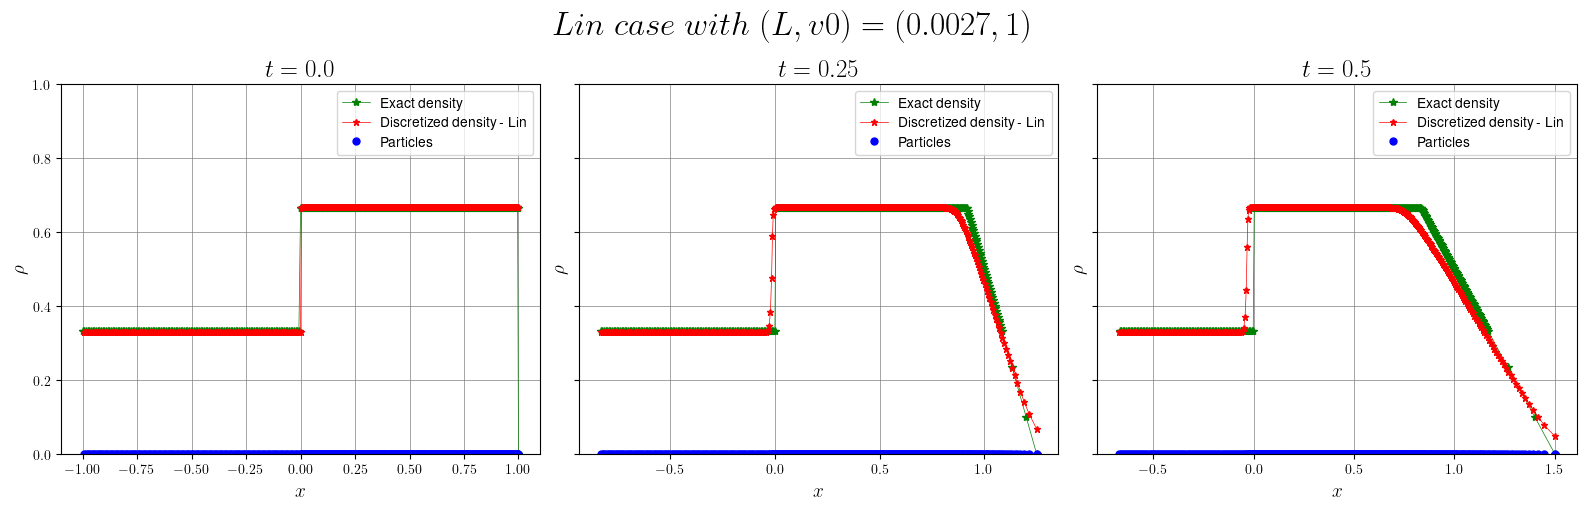



The min MAE is 0.009498141608562563 and it's reached at 1, so for L=0.0024000000000000002


In [13]:
err_list = []

for L, v0 in zip(Lrange_lin, v0range_lin):

    # Computation
    sol = odeint(TD_LWR_model, xspan, tspan, args=(Nx, v0, L, 'Lin'), tfirst = True).T
    ln = 1/Nx
    rho_dis = ln/np.diff(sol, axis=0)
    title = fr"$Lin\ case\ with\ (L,v0)={L,v0}$"
        
    # Initialize the fig
    nrow, ncol = 1, 3
    width, height = 7, 6

    fig = plt.figure(figsize=(width*ncol*.75,height*nrow*.75), constrained_layout=True)
    plt.suptitle(title, fontsize=24, y=1.1); # Figure titles

    # create 1 x cols subplots per subfig
    axs = fig.subplots(nrows=1, ncols=ncol, sharey = True)

    err_l = []
    
    for col, (ax, i) in enumerate(zip(axs, idx)):

        t = tspan[i]
        
        # exact density
        idx_t, (cp_t, d_t), _, _ = rho_2s(xlims, N, tspan, rho_l, rho_r, rho_out, flux, np.round(t,8), drho)
        
        ax.plot(cp_t, d_t, c='g', ls = '-', lw = .5, marker='*', label="Exact density")
        
        x = sol[:,i][1:]
        ax.plot(x,rho_dis[:,i],c='red', ls='-', lw = 0.5, ms=5, marker='*', label="Discretized density - Lin")
        ax.plot(x,x*0,c='blue', ls='', ms=5, marker='o', label="Particles")
        
        err = mean_absolute_error(y_true = d_t, y_pred = rho_dis[:,i])
        err_l.append([err, tspan[i],[L,v0]])
        print(fr"At t={t}, MAE={err}")
        
    #     ax.set_xlim([-1.5,1.5])
        ax.set_ylim([0, 1])
        ax.set_xlabel(r"$x$",fontsize=14)
        ax.set_ylabel(fr"$\rho$",fontsize=14)
        ax.set_title(fr"$t={t.round(2)}$",fontsize=18)

        ax.grid(color='grey', linestyle='-', linewidth=0.5)
        ax.legend()

    tmp = [e[0] for e in err_l]
    print(fr"MAE mean value = {np.mean(tmp)}")
    err_list.append(err_l)
        
    plt.show()
    print("\n")
    
tmp = [np.mean([e[0] for e in err_l]) for err_l in err_list]
ltmp = [err_l[0][2][0] for err_l in err_list]
mmin = np.min(tmp)
imin = tmp.index(mmin)

print(fr"The min MAE is {mmin} and it's reached at {imin}, so for L={ltmp[imin]}")

## Best plot: LIN

In [14]:
## Params
L_linbest = 0.0025

# Solve the ODE system in this time interval
sol_linbest = odeint(TD_LWR_model, xspan, tspan, args=(Nx, v0, L_linbest, 'Lin'), tfirst = True).T

# Discretized density
ln = 1/Nx
rho_dis_linbest = ln/np.diff(sol_linbest, axis=0)

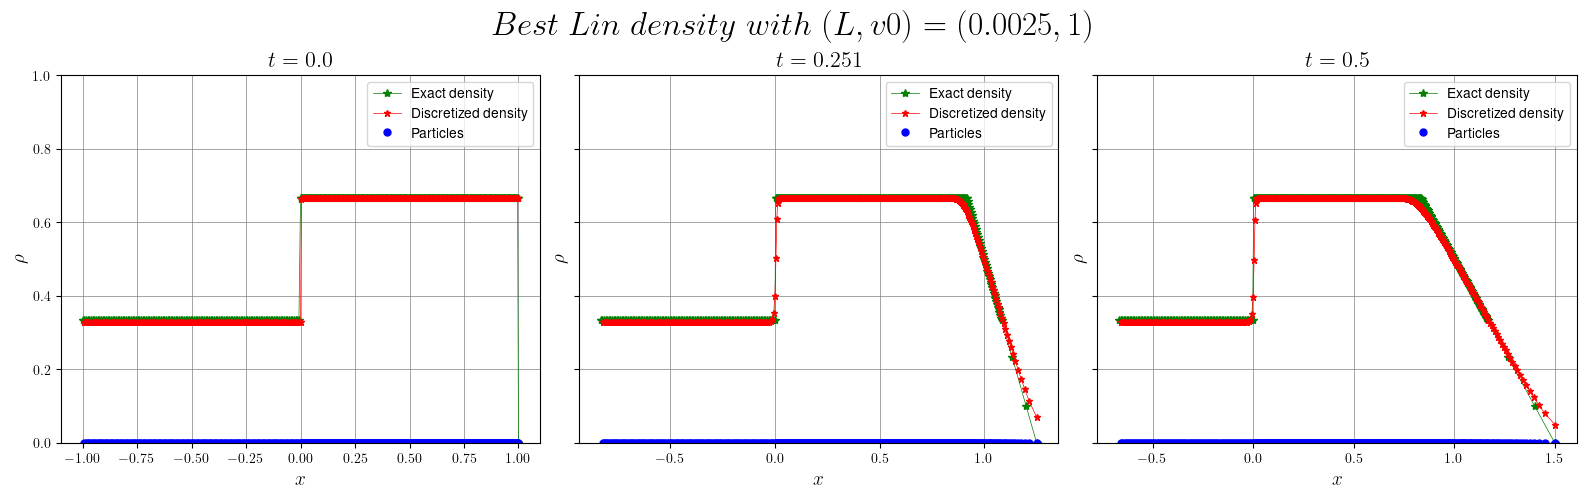

MAE: 0.009841854203050823


In [15]:
# Initialize the fig
nrow, ncol = 1, 3
width, height = 7, 6.5

fig = plt.figure(figsize=(width*ncol*.75,height*nrow*.75), constrained_layout=True)
plt.suptitle(fr"$Best\ Lin\ density\ with\ (L,v0)={L_linbest,v0}$", fontsize=24); # Figure titles

axs = fig.subplots(nrows=1, ncols=ncol, sharey = True)

err_l = []

for col, (ax, i) in enumerate(zip(axs, idx)):

    t = tspan[i]
    
    # exact density
    idx_t, (cp_t, d_t), _, _ = rho_2s(xlims, N, tspan, rho_l, rho_r, rho_out, flux, np.round(t,8), drho)
    ax.plot(cp_t, d_t, c='g', ls = '-', lw = .5, marker='*', label="Exact density")
    
    x = sol_linbest[:,i][1:]
    ax.plot(x,rho_dis_linbest[:,i],c='red', ls='-', lw = 0.5, ms=5, marker='*', label="Discretized density")
    ax.plot(x,x*0,c='blue', ls='', ms=5, marker='o', label="Particles")

    err_l.append(mean_absolute_error(y_true = d_t, y_pred = rho_dis_linbest[:,i]))
    
#     ax.set_xlim([-1.5,1.5])
    ax.set_ylim([0, 1])
    ax.set_xlabel(r"$x$",fontsize=14)
    ax.set_ylabel(fr"$\rho$",fontsize=14)
    ax.set_title(fr"$t={t.round(3)}$",fontsize=16)

    ax.grid(color='grey', linestyle='-', linewidth=0.5)
    ax.legend()

plt.show()

print(fr"MAE: {np.mean(err_l)}")

In [16]:
len(rho_dis_linbest), len(sol_linbest)

(399, 400)

# Log case

## Test with different $L$ and $v_0$

In [17]:
Lstart, Lend, Lpoints = .0115, .012, 3
Lrange_log = np.linspace(Lstart, Lend, Lpoints)
v0range_log = [v0 for i in range(len(Lrange_log))]

## Plot params
idx = 0, 5, 10

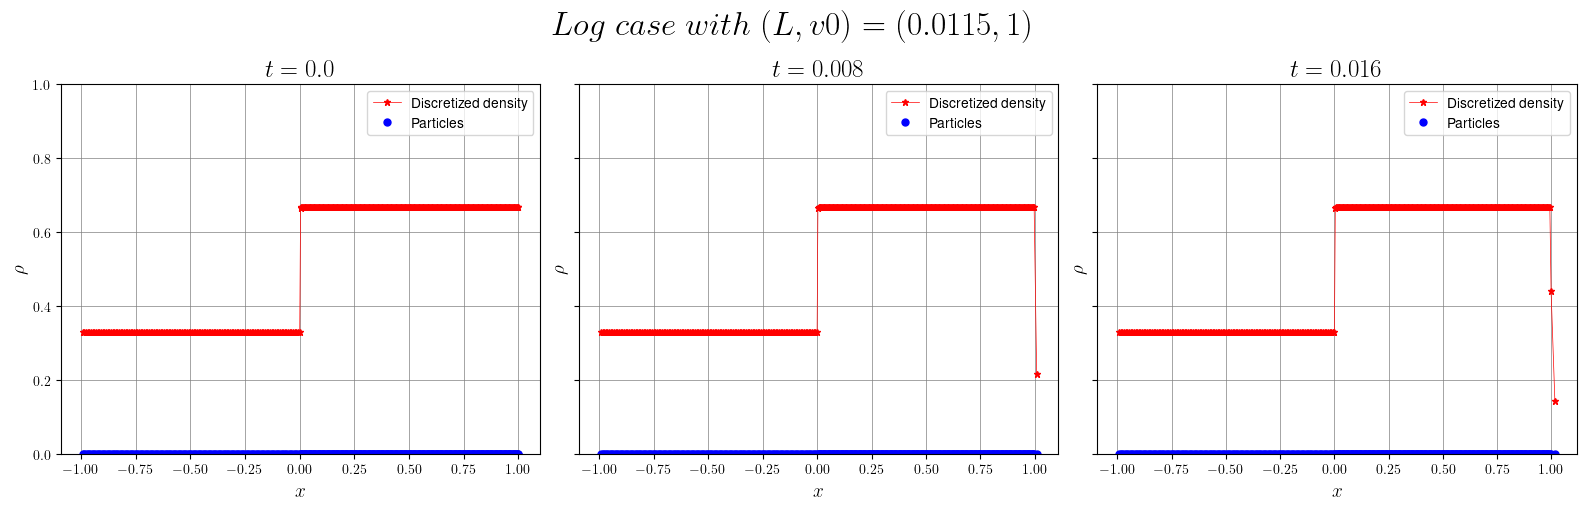

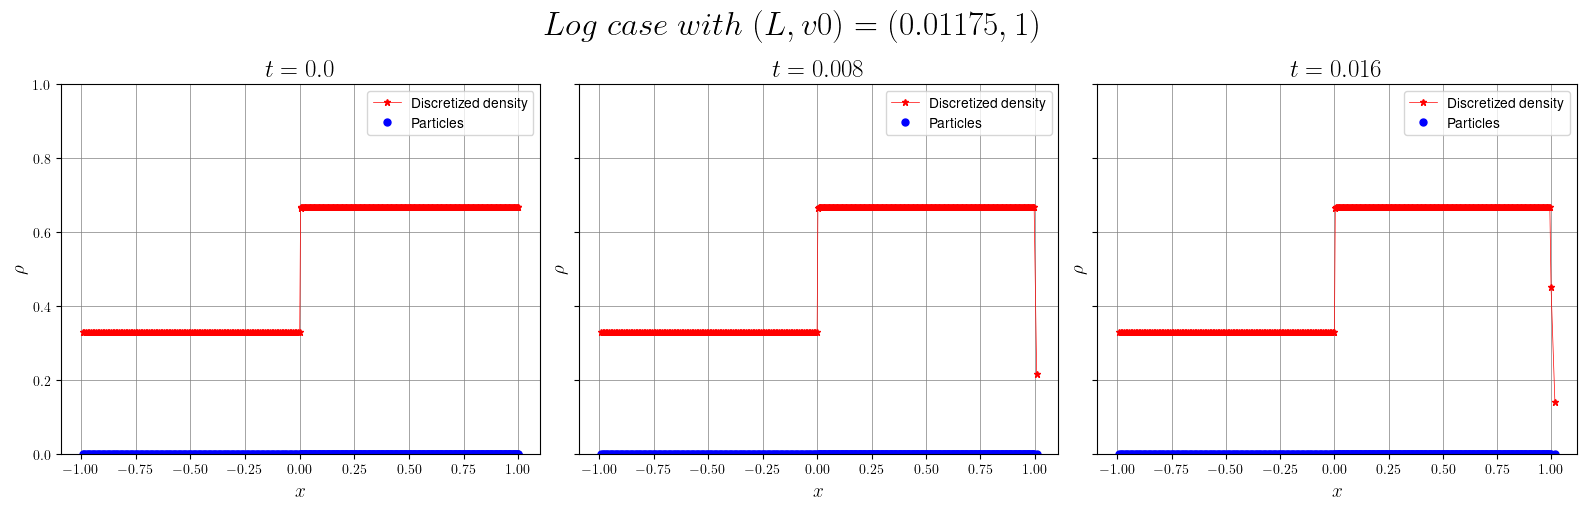

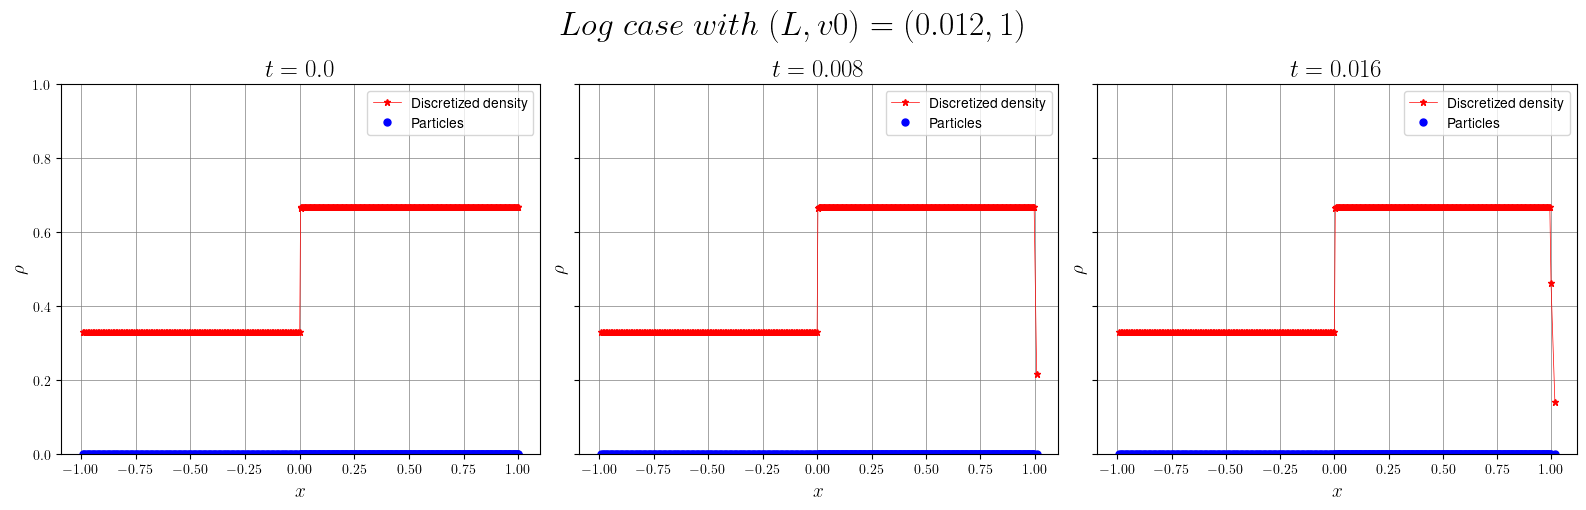

In [18]:
for L, v0 in zip(Lrange_log, v0range_log):

    # LIN CASE
    sol = odeint(TD_LWR_model, xspan, tspan, args=(Nx, v0, L, 'Log'), tfirst = True).T
    title = fr"$Log\ case\ with\ (L,v0)={L,v0}$"
    
    # Discretized density
    ln = 1/Nx
    rho_dis = ln/np.diff(sol, axis=0)
    
    # Initialize the fig
    nrow, ncol = 1, 3
    width, height = 7, 6

    fig = plt.figure(figsize=(width*ncol*.75,height*nrow*.75), constrained_layout=True)
    plt.suptitle(title, fontsize=24, y=1.1); # Figure titles

    # create 1 x cols subplots per subfig
    axs = fig.subplots(nrows=1, ncols=ncol, sharey = True)

    for col, (ax, i) in enumerate(zip(axs, idx)):

        t = tspan[i]
        x = sol[:,i][1:]
        ax.plot(x,rho_dis[:,i],c='red', ls='-', lw = 0.5, ms=5, marker='*', label="Discretized density")
        ax.plot(x,x*0,c='blue', ls='', ms=5, marker='o', label="Particles")

    #     ax.set_xlim([-1.5,1.5])
        ax.set_ylim([0, 1])
        ax.set_xlabel(r"$x$",fontsize=14)
        ax.set_ylabel(fr"$\rho$",fontsize=14)
        ax.set_title(fr"$t={t.round(3)}$",fontsize=18)

        ax.grid(color='grey', linestyle='-', linewidth=0.5)
        ax.legend()

    plt.show()
    print("\n")

## Best plot: Log

In [19]:
## Params
L_logbest = 0.01175
idx_logbest = 0, 5, 10

In [20]:
# Solve the ODE system in this time interval
sol_logbest = odeint(TD_LWR_model, xspan, tspan, args=(Nx, v0, L_logbest, 'Log'), tfirst = True).T

# Discretized density
ln = 1/Nx
rho_dis = ln/np.diff(sol_logbest, axis=0)

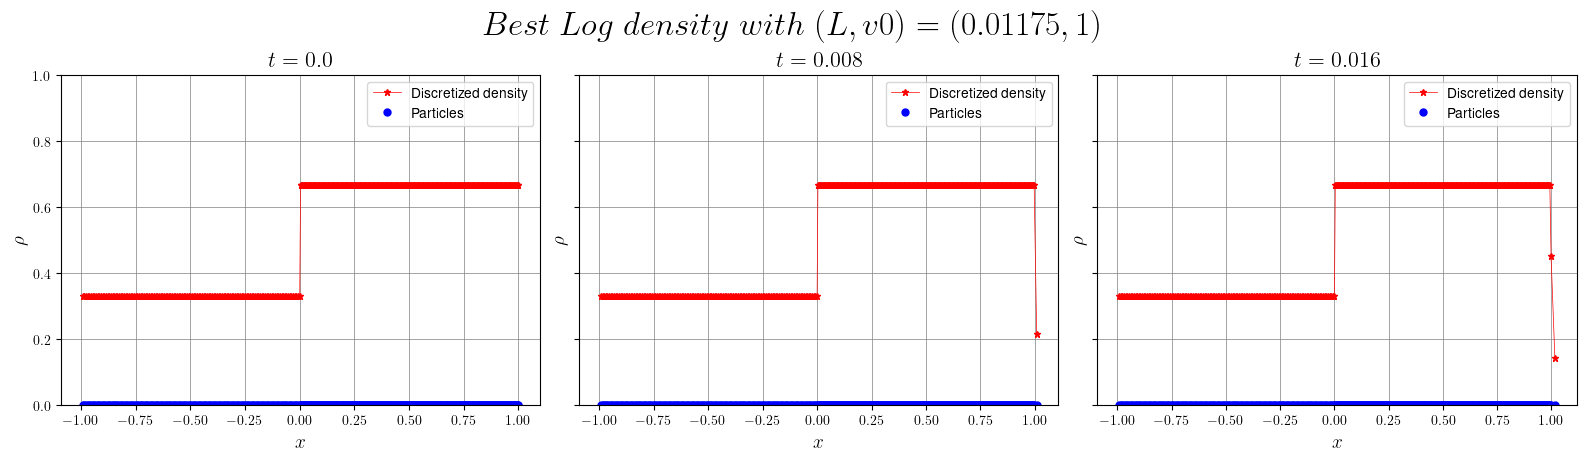

In [21]:
# Initialize the fig
nrow, ncol = 1, 3
width, height = 7, 6

fig = plt.figure(figsize=(width*ncol*.75,height*nrow*.75), constrained_layout=True)
plt.suptitle(fr"$Best\ Log\ density\ with\ (L,v0)={L_logbest,v0}$", fontsize=24); # Figure titles

axs = fig.subplots(nrows=1, ncols=ncol, sharey = True)

for col, (ax, i) in enumerate(zip(axs, idx)):

    t = tspan[i]
    x = sol_logbest[:,i][1:]
    ax.plot(x,rho_dis[:,i],c='red', ls='-', lw = 0.5, ms=5, marker='*', label="Discretized density")
    ax.plot(x,x*0,c='blue', ls='', ms=5, marker='o', label="Particles")

#     ax.set_xlim([-1.5,1.5])
    ax.set_ylim([0, 1])
    ax.set_xlabel(r"$x$",fontsize=14)
    ax.set_ylabel(fr"$\rho$",fontsize=14)
    ax.set_title(fr"$t={t.round(3)}$",fontsize=16)

    ax.grid(color='grey', linestyle='-', linewidth=0.5)
    ax.legend()

plt.show()